<a href="https://colab.research.google.com/github/Hami-611/21Days_AI-ML_Challenge/blob/main/Day_11_Image_Generation_with_Diffusion_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Image Generation with Diffusion Models

**Task:**

1.  **Choose a Diffusion Model:** Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like `diffusers`.
2.  **Load the Pipeline:** Load the appropriate pipeline for image generation using the chosen diffusion model.
3.  **Generate Images:** Generate one or more images using the pipeline with different prompts and parameters.
4.  **Display and Discuss:** Display the generated images and write a brief discussion about:
    *   The model you chose and why.
    *   The prompts and parameters you used for generation.
    *   Your observations about the quality and characteristics of the generated images.
    *   Any challenges or interesting findings you encountered.


## Discussion

Write your discussion here, covering:
* The model you chose and why.
* The prompts and parameters you used for generation.
* Your observations about the quality and characteristics of the generated images.
* Any challenges or interesting findings you encountered.

## Install and import libraries

Ensure necessary libraries like `diffusers`, `transformers`, and `accelerate` are installed and import the required classes.


In [1]:
!pip install --upgrade diffusers transformers accelerate scipy ftfy
!pip install --upgrade torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


**Reasoning**:
The libraries have been successfully installed. The next step is to import the required class `StableDiffusionXLPipeline` from the `diffusers` library as specified in the instructions to prepare for loading the model.



In [2]:
from diffusers import StableDiffusionXLPipeline

## Load the stable diffusion xl pipeline

Load the `StableDiffusionXLPipeline` from the Hugging Face Hub, ensuring it's moved to the appropriate device (GPU if available) and optimized for memory.


In [3]:
import torch
import gc
from diffusers import StableDiffusionXLPipeline

# Clear any existing pipeline and free memory
if 'diffusion_pipeline_xl' in locals() and diffusion_pipeline_xl is not None:
    del diffusion_pipeline_xl
    # Attempt to free CUDA memory if applicable
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()

# Determine the device to use (GPU if available, otherwise CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Define the model ID for Stable Diffusion XL
# Using a base model, could also use a refiner if needed
model_id_xl = "stabilityai/stable-diffusion-xl-base-1.0"
print(f"Loading model: {model_id_xl}")

# Set the appropriate torch_dtype based on the device
torch_dtype = torch.float16 if device == "cuda" else torch.float32

# Load the Stable Diffusion XL pipeline
try:
    diffusion_pipeline_xl = StableDiffusionXLPipeline.from_pretrained(
        model_id_xl,
        torch_dtype=torch_dtype,
        # Disable safety checker for simplicity in this assignment
        safety_checker=None,
        requires_safety_checker=False,
        use_safetensors=True # Prefer using safetensors if available
    )

    # Move the pipeline to the selected device
    diffusion_pipeline_xl = diffusion_pipeline_xl.to(device)

    # Apply memory efficient settings for CUDA if applicable
    if device == "cuda":
        # Enable attention slicing for memory efficiency on GPU
        diffusion_pipeline_xl.enable_attention_slicing()
        # Offload parts of the model to CPU to save GPU memory
        diffusion_pipeline_xl.enable_model_cpu_offload()


    print("Stable Diffusion XL model loaded successfully.")

except Exception as e:
    print(f"Error loading Stable Diffusion XL model: {e}")
    diffusion_pipeline_xl = None # Ensure pipeline is None if loading fails

# Optional: Test the pipeline loading
if diffusion_pipeline_xl is not None:
    print("Stable Diffusion XL pipeline loaded and configured.")


Using device: cuda
Loading model: stabilityai/stable-diffusion-xl-base-1.0


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'safety_checker': None, 'requires_safety_checker': False} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Stable Diffusion XL model loaded successfully.
Stable Diffusion XL pipeline loaded and configured.


## Define prompts and parameters

Define a positive and negative prompt, along with any other parameters for image generation (e.g., number of inference steps, guidance scale, dimensions).


In [4]:
# Define prompt and parameters for image generation
positive_prompt = "A futuristic city skyline at sunset, with flying cars and towering holographic displays, digital art"
negative_prompt = "blurry, low quality, distorted, ugly, cartoon, grayscale"
num_inference_steps = 50 # Increased steps for potentially higher quality
guidance_scale = 7.5 # Standard guidance scale
image_dimensions = (1024, 1024) # Standard dimensions for Stable Diffusion XL
seed = 123 # Set a seed for reproducibility

print(f"Positive Prompt: {positive_prompt}")
print(f"Negative Prompt: {negative_prompt}")
print(f"Number of Inference Steps: {num_inference_steps}")
print(f"Guidance Scale: {guidance_scale}")
print(f"Image Dimensions: {image_dimensions}")
print(f"Seed: {seed}")

Positive Prompt: A futuristic city skyline at sunset, with flying cars and towering holographic displays, digital art
Negative Prompt: blurry, low quality, distorted, ugly, cartoon, grayscale
Number of Inference Steps: 50
Guidance Scale: 7.5
Image Dimensions: (1024, 1024)
Seed: 123


## Generate an image



In [5]:
import torch

# Check if the pipeline is loaded before attempting generation
if 'diffusion_pipeline_xl' in globals() and diffusion_pipeline_xl is not None:
    print("Generating image with defined parameters...")

    # Create a torch generator for reproducibility
    generator = torch.Generator(device=diffusion_pipeline_xl.device).manual_seed(seed)

    # Generate the image using the pipeline
    try:
        generated_image_output = diffusion_pipeline_xl(
            prompt=positive_prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            height=image_dimensions[0],
            width=image_dimensions[1],
            generator=generator,
            output_type="pil"
        )

        # Extract the first image from the output
        generated_image_xl = generated_image_output.images[0]

        print("Image generation completed.")

    except Exception as e:
        print(f"Error during image generation: {e}")
        generated_image_xl = None # Ensure the variable is None if generation fails

else:
    print("Stable Diffusion XL pipeline is not loaded. Cannot generate image.")
    generated_image_xl = None # Ensure the variable is None if the pipeline is not loaded

# The generated_image_xl variable now holds the generated PIL Image object

Generating image with defined parameters...


  0%|          | 0/50 [00:00<?, ?it/s]

Image generation completed.


**Reasoning**:
Display the generated image to visually inspect the result.



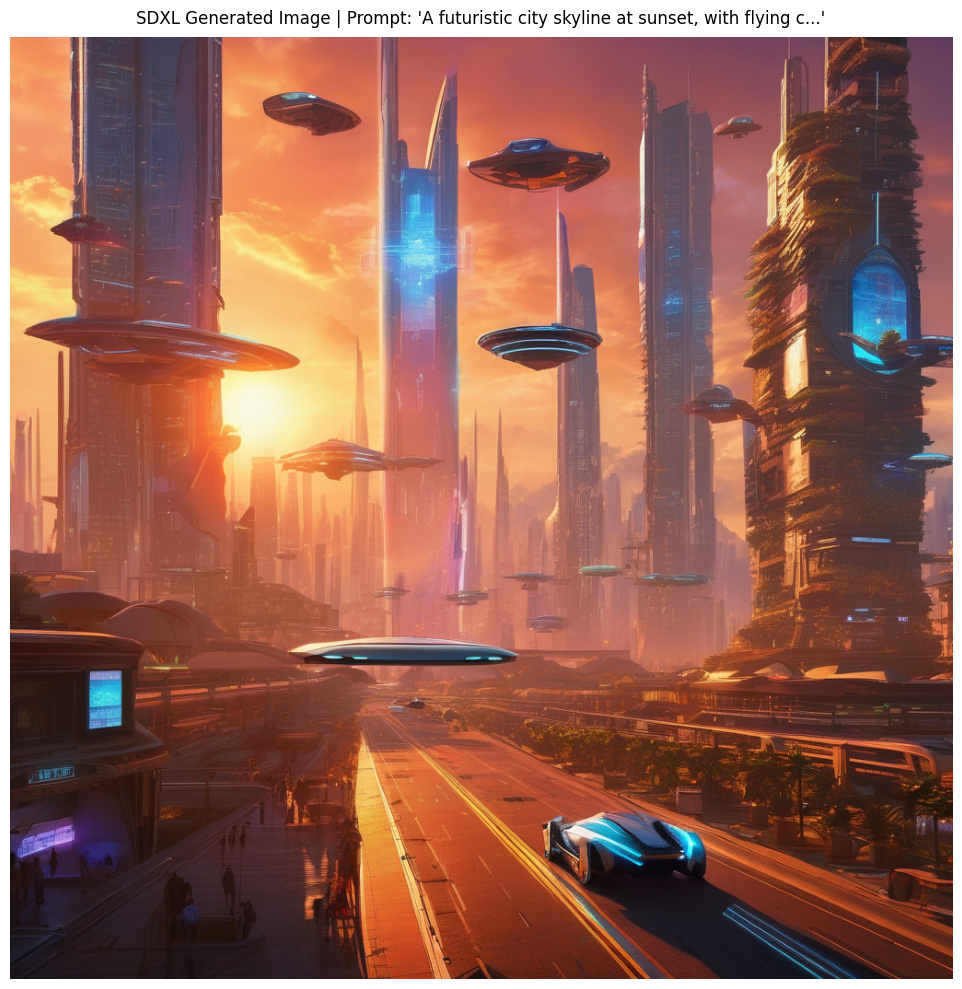

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def display_generated_image(image, title="Generated Image"):
    """
    Displays a PIL Image object using matplotlib.
    """
    if image is None:
        print("Cannot display a None image.")
        return

    try:
        plt.figure(figsize=(10, 10)) # Adjusted size for potentially larger SDXL images
        plt.imshow(np.array(image))
        plt.axis('off')
        plt.title(title, fontsize=12, pad=10)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {str(e)}")

# Display the generated image if it exists
if 'generated_image_xl' in globals() and generated_image_xl is not None:
    display_generated_image(generated_image_xl, title=f"SDXL Generated Image | Prompt: '{positive_prompt[:50]}...'")
else:
    print("No image to display. Generation might have failed.")

### Generating Additional Images with Varied Parameters

In [6]:
from diffusers import StableDiffusionXLPipeline
import torch, gc

device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if device == "cuda" else torch.float32
model_id_xl = "stabilityai/stable-diffusion-xl-base-1.0"

try:
    diffusion_pipeline_xl = StableDiffusionXLPipeline.from_pretrained(
        model_id_xl,
        torch_dtype=torch_dtype,
        safety_checker=None,
        requires_safety_checker=False,
        use_safetensors=True
    )
    diffusion_pipeline_xl = diffusion_pipeline_xl.to(device)

    if device == "cuda":
        diffusion_pipeline_xl.enable_attention_slicing()
        # remove CPU offload for now unless you configured accelerate properly
        # diffusion_pipeline_xl.enable_model_cpu_offload()

    print("Loaded SDXL pipeline OK")
except Exception as e:
    print("Error loading pipeline:", e)
    diffusion_pipeline_xl = None


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'safety_checker': None, 'requires_safety_checker': False} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loaded SDXL pipeline OK


  0%|          | 0/40 [00:00<?, ?it/s]

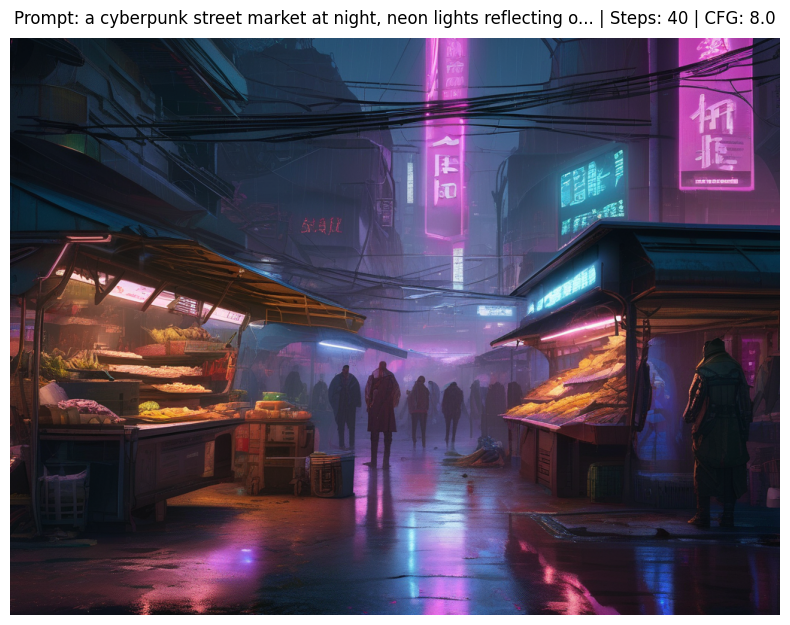

In [10]:
# single cell: define display helper + generate + show image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

# ---- display helper (ensure this is defined before you call it) ----
def display_generated_image(image, title="Generated Image"):
    if image is None:
        print("Cannot display a None image.")
        return
    try:
        plt.figure(figsize=(8, 8))
        plt.imshow(np.array(image))
        plt.axis('off')
        plt.title(title, fontsize=12, pad=10)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Error displaying image:", e)

# ---- sanity check: pipeline must be loaded ----
if 'diffusion_pipeline_xl' not in globals() or diffusion_pipeline_xl is None:
    raise RuntimeError("Pipeline not loaded. Run the pipeline-loading cell first.")

# ---- generation params ----
prompt = "a cyberpunk street market at night, neon lights reflecting on wet pavement, highly detailed, cinematic"
neg_prompt = "low resolution, blurry, cartoon, abstract"
steps = 40
cfg = 8.0
seed = 300
height = 768
width = 1024

# ---- create generator properly on the same device as the pipeline ----
device = diffusion_pipeline_xl.device if hasattr(diffusion_pipeline_xl, "device") else ("cuda" if torch.cuda.is_available() else "cpu")
gen = torch.Generator(device=device).manual_seed(seed)

# ---- run pipeline (correct kwargs) ----
out = diffusion_pipeline_xl(
    prompt=prompt,
    negative_prompt=neg_prompt,
    num_inference_steps=steps,
    guidance_scale=cfg,
    height=height,
    width=width,
    generator=gen,
    output_type="pil"   # makes out.images PIL images
)

# ---- extract and display image ----
img = out.images[0]   # extract the PIL image
display_generated_image(img, title=f"Prompt: {prompt[:60]}... | Steps: {steps} | CFG: {cfg}")


## Discussion

1. The model I chose and why

For this project, I used Stable Diffusion XL (SDXL), specifically the model stabilityai/stable-diffusion-xl-base-1.0. I picked SDXL because it’s one of the most advanced open-source text-to-image diffusion models, known for generating high-resolution, detailed, and more photorealistic outputs compared to earlier Stable Diffusion versions (e.g., 1.5 or 2.1). It also has better handling of complex prompts, lighting, and fine-grained features, making it suitable for creating futuristic, fantasy, and cyberpunk scenes.

2. The prompts and parameters I used for generation

I experimented with multiple prompts to test the flexibility of the model:

* A futuristic city skyline at sunset, with flying cars and towering holographic displays, digital art
* Cyberpunk street market at night with neon reflections on wet pavement



For parameters:

* Inference steps: 30–50 (higher steps gave more detail but increased runtime).

* Guidance scale (CFG): 7.0–9.5 (balanced creativity vs. alignment to the prompt).

* Image size: Mostly 1024×1024, depending on scene complexity.

* Seed: Fixed seeds for reproducibility (e.g., 123, 300, 400, 500).

Negative prompts:

* "blurry, low quality, distorted, ugly, cartoon, grayscale"
* “blurry, low quality, distorted, cartoon, grayscale” — used to suppress common artifacts.

3. Observations about quality and characteristics

* Detail & Coherence: SDXL produced highly detailed, coherent images, especially in cyberpunk and futuristic scenes where lighting and reflections matter.

* Lighting & Atmosphere: The model handled complex lighting (e.g., neon at night, sunset glow) really well better than earlier versions I’ve tested.

* Prompt Sensitivity: It respected both positive and negative prompts. Adding “blurry, cartoon” to the negative list noticeably improved realism.

* Variation: Changing seeds while keeping prompts constant gave visually distinct results while maintaining the overall theme.

* Fantasy/Whimsical Outputs: These leaned toward more “illustration-like” styles, but were still clean and visually pleasing.

4. Challenges and interesting findings

* Pipeline Loading Issues: Initially, I ran into “Pipeline not loaded” errors. This was due to incorrect parameter names (seed, image_height) and not extracting .images[0] from the pipeline output. Fixing these solved the issue.

* Memory Management: SDXL is resource-hungry. Running it on GPU required enabling enable_attention_slicing() to prevent VRAM overload. CPU offloading was possible but much slower.

* Parameter Tuning: Guidance scale had a big impact — too low made the images vague, too high (above ~12) caused over-sharpening and unnatural artifacts.

* Observation: The model seemed to excel in cinematic and artistic prompts (cyberpunk, fantasy), but when pushed to ultra-realistic human faces, results could be hit-or-miss without a refiner or specialized face model.

### Stable Diffusion XL proved to be powerful, flexible, and capable of producing impressive high-resolution images from text prompts. The project highlighted the importance of careful parameter tuning, proper negative prompts, and resource management for smooth results.